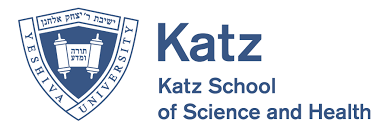

# Jesus Olivera
## Yeshiva University, DAV
## Independent Study: Data Labeling Tool 

Consider these tips for working with this notebook:
- Notebook code serves as a first step in a logical foundation for the development of this project.
- This pipeline is optimized for the original framework, and it will have to be updated to reflect the actual environment in which it will be deployed.
- Before modifying the pipeline or trying to re-fit the pipeline, consider evaluating system integration and tools setup.

## Notebook Content

This notebook contains a logical framework for parsing annotation outputs. The script will serve as first step in the development of a transformation and refinement data flow. The current script does not fully parse the data. Further data wrangling is required.   

Familiarity with data engineering (DE) and data science (DS) is required.

## Notebook Goals 

- Pipeline Sample Definition
- Pipeline Sample Evaluation

# Step 1: Importing Libraries

In [1]:
# Importing libraries
import sys
#!{sys.executable} -m pip install <library>
import pandas as pd
import numpy as np
from timeit import timeit
import boto3
import s3fs
import datetime as dt
import os
import tweepy
import json
from io import StringIO
import io

## S3 Bucket Credentials

In [2]:
# Bucket Keys
aws_access_key_id= '<AWS ACCESS KEY ID>',
aws_secret_access_key='<AWS SECRET ACCESS KEY>'

## Parsing Logic 

In [3]:
s3 = boto3.resource('s3')
bucket = s3.Bucket('annotationoutput')
# Iterates through all the objects, doing the pagination for you. Each obj
# is an ObjectSummary, so it doesn't contain the body. You'll need to call
# get to get the whole body.
list1 = []
for obj in bucket.objects.all():
    key = obj.key
    data = obj.get()['Body'].read()
    list1.append(pd.read_csv(io.BytesIO(data), header=0, delimiter=",", low_memory=False))

In [4]:
# List Output
list1

[Empty DataFrame
 Columns: [{"id": 1,  "created_username": " olivera@mail.yu.edu,  1",  "created_ago": "1\u00a0hour,  49\u00a0minutes",  "task": {"id": 1,  "data": {"image": "s3://tweetsdatatest/tweets_test120220219.csv"},  "meta": {},  "created_at": "2022-02-26T19:45:04.995912Z",  "updated_at": "2022-03-19T17:47:12.195781Z",  "is_labeled": false,  "overlap": 1,  "project": 1,  "file_upload": null},  "completed_by": {"id": 1,  "first_name": "",  "last_name": "",  "email": "olivera@mail.yu.edu"},  "result": [],  "was_cancelled": true,  "ground_truth": false,  "created_at": "2022-03-19T17:47:11.607751Z",  "updated_at": "2022-03-19T17:47:11.608751Z",  "lead_time": 5.381,  "parent_prediction": null,  "parent_annotation": null}]
 Index: []
 
 [0 rows x 26 columns],
 Empty DataFrame
 Columns: [{"id": 2,  "created_username": " olivera@mail.yu.edu,  1",  "created_ago": "1\u00a0hour,  49\u00a0minutes",  "task": {"id": 2,  "data": {"image": "s3://tweetsdatatest/tweets_test220220319.csv"},  "meta

## List to Dataframe V1

In [5]:
df = pd.DataFrame.from_records(list1)
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,"{""id"": 1","""created_username"": "" olivera@mail.yu.edu","1""","""created_ago"": ""1\u00a0hour","49\u00a0minutes""","""task"": {""id"": 1","""data"": {""image"": ""s3://tweetsdatatest/tweets...","""meta"": {}","""created_at"": ""2022-02-26T19:45:04.995912Z""","""updated_at"": ""2022-03-19T17:47:12.195781Z""",...,"""ground_truth"": false","""created_at"": ""2022-03-19T17:47:11.607751Z""","""updated_at"": ""2022-03-19T17:47:11.608751Z""","""lead_time"": 5.381","""parent_prediction"": null","""parent_annotation"": null}",None,None,None,None
1,"{""id"": 2","""created_username"": "" olivera@mail.yu.edu","1""","""created_ago"": ""1\u00a0hour","49\u00a0minutes""","""task"": {""id"": 2","""data"": {""image"": ""s3://tweetsdatatest/tweets...","""meta"": {}","""created_at"": ""2022-03-19T16:51:24.557485Z""","""updated_at"": ""2022-03-19T17:47:15.738465Z""",...,"""ground_truth"": false","""created_at"": ""2022-03-19T17:47:15.458588Z""","""updated_at"": ""2022-03-19T17:47:15.458588Z""","""lead_time"": 2.256","""parent_prediction"": null","""parent_annotation"": null}",None,None,None,None
2,"{""id"": 3","""created_username"": "" olivera@mail.yu.edu","1""","""created_ago"": ""29\u00a0minutes""","""task"": {""id"": 3","""data"": {""image"": ""s3://tweetsdatatest/tweets...","""meta"": {}","""created_at"": ""2022-03-19T17:53:34.764420Z""","""updated_at"": ""2022-03-19T19:07:16.083763Z""","""is_labeled"": false",...,"""created_at"": ""2022-03-19T19:07:15.723555Z""","""updated_at"": ""2022-03-19T19:07:15.723555Z""","""lead_time"": 2.773","""parent_prediction"": null","""parent_annotation"": null}",None,None,None,None,None
3,"{""id"": 4","""created_username"": "" olivera@mail.yu.edu","1""","""created_ago"": ""0\u00a0minutes""","""task"": {""id"": 12","""data"": {""image"": ""s3://picsbuckettest/pic_01...","""meta"": {}","""created_at"": ""2022-03-19T19:30:28.776070Z""","""updated_at"": ""2022-03-19T19:35:51.111550Z""","""is_labeled"": true",...,"""to_name"": ""image""","""type"": ""choices""","""origin"": ""manual""}]","""was_cancelled"": false","""ground_truth"": false","""created_at"": ""2022-03-19T19:35:50.763951Z""","""updated_at"": ""2022-03-19T19:35:50.763951Z""","""lead_time"": 137.298","""parent_prediction"": null","""parent_annotation"": null}"
